# Layers Of A Neural Network
In this post, we'll be working to better understand the layers within an artificial neural network. We'll also see how to add layers to a sequential model in Keras.In the last post, we saw how the neurons in an ANN are organized into layers. The examples we looked at showed the use of dense layers, which are also known as fully connected layers. There are, however, different types of layers. Some examples include:
Dense (or fully connected) layers
Convolutional layers
Pooling layers
Recurrent layers
Normalization layers

# Why Have Different Types Of Layers?
Different layers perform different transformations on their inputs, and some layers are better suited for some tasks than others.
For example, a convolutional layer is usually used in models that are doing work with image data. Recurrent layers are used in models that are doing work with time series data, and fully connected layers, as the name suggests, fully connects each input to each output within its layer.For now, we will keep our focus on layers in general, and we'll learn more in depth about specific layer types as we descend deeper into deep learning.
Example Artificial Neural Network
Let's consider the following example ANN:

In [1]:
from PIL import Image
import requests


In [2]:
url ="https://deeplizard.com/images/png/deep%20neural%20network%20with%204%20layers.png"

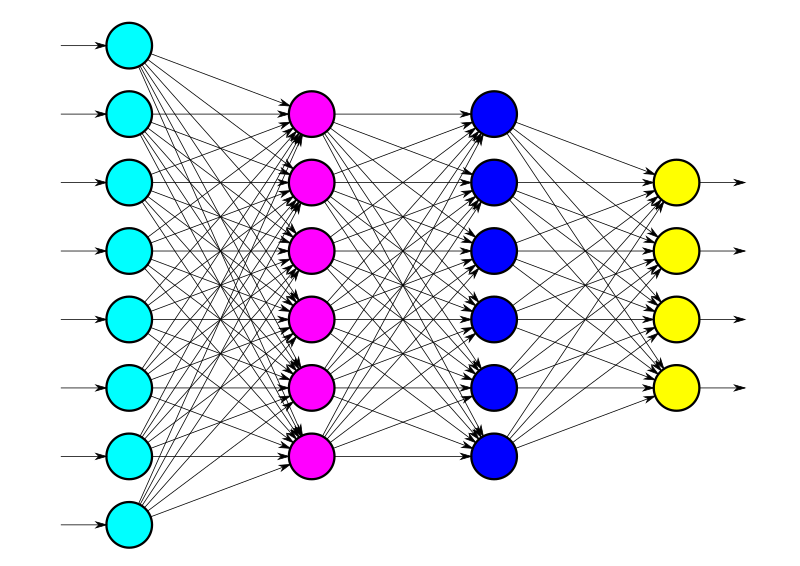

In [3]:
im = Image.open(requests.get(url, stream=True).raw)
im

 We can see that the first layer, the input layer, consists of eight nodes. Each of the eight nodes in this layer represents an individual feature from a given sample in our dataset.
This tells us that a single sample from our dataset consists of eight dimensions. When we choose a sample from our dataset and pass this sample to the model, each of the eight values contained in the sample will be provided to a corresponding node in the input layer.Each connection between the first and second layers transfers the output from the previous node to the input of the receiving node (left to right). The two layers in the middle that have six nodes each are hidden layers simply because they are positioned between the input and output layers.



# Layer Weights
Each connection between two nodes has an associated weight, which is just a number.
Each weight represents the strength of the connection between the two nodes. When the network receives an input at a given node in the input layer, this input is passed to the next node via a connection, and the input will be multiplied by the weight assigned to that connection.
For each node in the second layer, a weighted sum is then computed with each of the incoming connections. This sum is then passed to an activation function, which performs some type of transformation on the given sum. For example, an activation function may transform the sum to be a number between zero and one. The actual transformation will vary depending on which activation function is used. More on activation functions later.

node output = activation(weighted sum of inputs)


# Forward Pass Through A Neural Network
Once we obtain the output for a given node, the obtained output is the value that is passed as input to the nodes in the next layer.
This process continues until the output layer is reached. The number of nodes in the output layer depends on the number of possible output or prediction classes we have. In our example, we have four possible prediction classes.
Suppose our model was tasked with classifying four types of animals. Each node in the output layer would represent one of four possibilities. For example, we could have cat, dog, llama or lizard. The categories or classes depend on how many classes are in our dataset.
For a given sample from the dataset, the entire process from input layer to output layer is called a forward pass through the network.

# Finding The Optimal Weights
As the model learns, the weights at all connections are updated and optimized so that the input data point maps to the correct output prediction class. More on this optimization process as we go deeper into deep learning.
This gives us a general introductory understanding about how layers are working inside ANNs. Let's now see how our model can be expressed using code in Keras.Defining The Neural Network In Code With Keras
In our previous discussion, we saw how to use Keras to build a sequential model. Now, let's do this for our example network.
Will start out by defining an list of Dense objects, our layers. This list will then be passed to the constructor of the sequential model.
Remember our network looks like this:



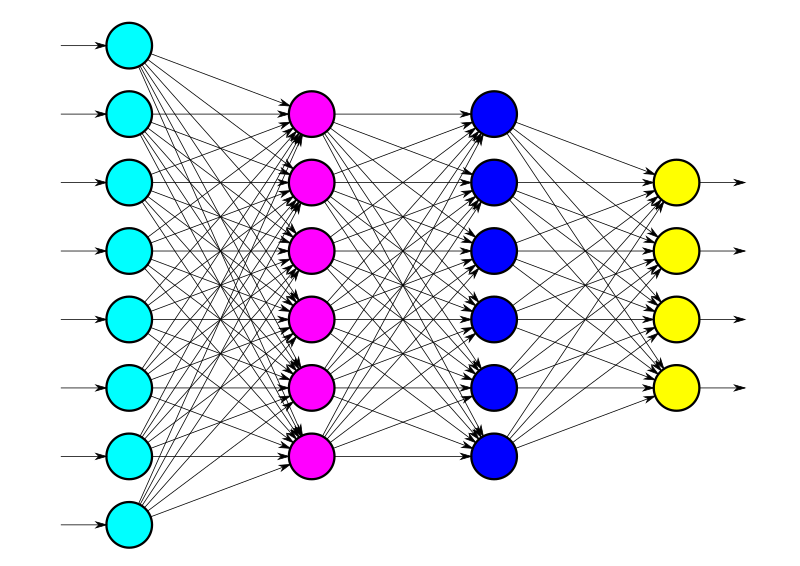

In [1]:
from PIL import Image
import requests
url ="https://deeplizard.com/images/png/deep%20neural%20network%20with%204%20layers.png"
im = Image.open(requests.get(url, stream=True).raw)
im

 Given this, we have:
 
 layers = [
 
    Dense(units=6, input_shape=(8,), activation='relu'),
    
    Dense(units=6, activation='relu'),
    
    Dense(units=4, activation='softmax')
]

Notice how the first Dense object specified in the list is not the input layer. The first Dense object is the first hidden layer. The input layer is specified as a parameter to the first Dense object's constructor.
Our input shape is eight. This is why our input shape is specified as input_shape=(8,). Our first hidden layer has six nodes as does our second hidden layer, and our output layer has four nodes.
For now, just note that we are using an activation function called relu activation='relu' for both of our hidden layers and an activation function called softmax activation='softmax' for our output layer. We'll cover these functions in more detail in our next post on activation functions.

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation

layers = [
    Dense(units=6, input_shape=(8,), activation='relu'),
    Dense(units=6, activation='relu'),
    Dense(units=4, activation='softmax')
]

model = Sequential(layers)

This is how our model can be expressed in code using Keras. Hopefully now you have a general understanding about what layers are in a neural network, and how they are functioning. I'll see ya in the next one!